<a href="https://colab.research.google.com/github/felipenjonas/lab_bdag/blob/main/credit_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

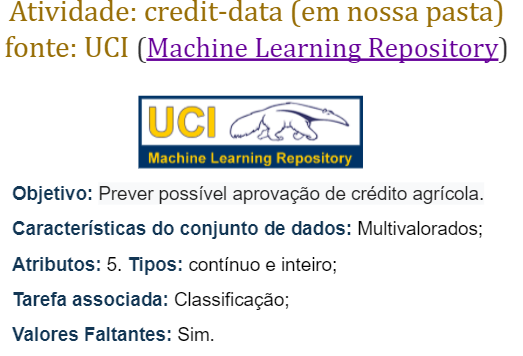

In [3]:
import pandas as pd

dataset = pd.read_csv("./credit-data.csv")

dataset.head()


,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


Localizando os dados negativos na coluna AGE e removendo 

In [4]:
# Localizar index que desejo remover
negative_age = dataset.loc[(dataset['age']) <= 0]
negative_age

# removendo 3 index 
ds2 = dataset.drop(index=[15,21,26])
# Validação se foram removidos
# ds2.loc[(dataset['age']) <= 0]
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  1997 non-null   int64  
 1   income    1997 non-null   float64
 2   age       1994 non-null   float64
 3   loan      1997 non-null   float64
 4   default   1997 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 93.6 KB


Preenchendo valores nulos em AGE com a média da coluna e cehcar se ainda tem algum nulo


In [5]:
# Calculando a mediana de age
age_median = ds2.age.median()
age_median
# Substituir os valores nulos pela mediana
ds2.fillna(age_median, inplace=True)
# Checa valores nulos
ds2.age.isnull().sum()



0

Substituir os valores negativos com a média da coluna AGE

In [6]:
# Calculando a média em Age
ds2.age.mean()


40.92838393378866

In [7]:
# Valores mais frequentes:
print(ds2.age.value_counts())

41.382673    3
49.499961    1
22.291962    1
20.986561    1
45.188194    1
            ..
47.418108    1
22.926914    1
50.418527    1
58.348455    1
52.374629    1
Name: age, Length: 1995, dtype: int64


In [8]:
# Substituir os valores negativos pela mediana
dataset.iloc[[15,21,26],2] = 41.382673
# Validando se ainda tem algum negativo
dataset.loc[(dataset['age']) <= 0]
# Validando se ainda tema algum nulo
dataset.age.isnull().sum()
# Substituir os valores nulos pela mediana
dataset.fillna(age_median, inplace=True)
# Validando se ainda tema algum nulo
print("valores nulos de clientid:", dataset.clientid.isnull().sum())
print("valores nulos de Income:", dataset.income.isnull().sum())
print("valores nulos de Age:", dataset.age.isnull().sum())
print("valores nulos de loan:", dataset.age.isnull().sum())

valores nulos de clientid: 0
valores nulos de Income: 0
valores nulos de Age: 0
valores nulos de loan: 0




- [x] Remover valores negativos em AGE
- [x] Substituir valores nulos pela mediana de Age

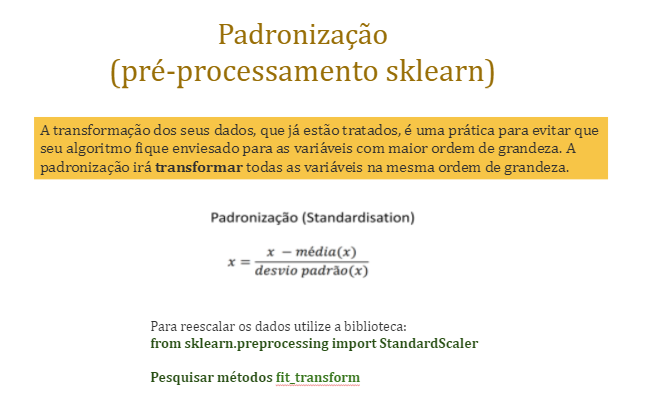


In [34]:
previsores = dataset.iloc[:,0:3].values
classe = dataset.iloc[:,4].values

from sklearn.preprocessing import StandardScaler

previsores = StandardScaler().fit_transform(previsores)



[[-1.731185    1.45393393  1.36527462]
 [-1.72945295 -0.76217555  0.54255534]
 [-1.7277209   0.83682073  1.67406504]
 ...
 [ 1.7277209  -0.07122592 -0.97458737]
 [ 1.72945295 -0.11000289  1.73926043]
 [ 1.731185    1.682986    1.14907046]]


https://www.bitdegree.org/learn/train-test-split


In [35]:
# Aplicando o classificador
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,classe,test_size = 0.25, random_state=0)

from sklearn.naive_bayes import GaussianNB
classificador = GaussianNB()

classificador.fit(previsores_treinamento, classe_treinamento)
previsores = classificador.predict(previsores_teste)


from sklearn.metrics import confusion_matrix, accuracy_score
# Matriz de confusão
matriz = confusion_matrix(classe_teste, previsores)
print("Matriz de confusão: \n", matriz)


# Acuracia
precisao = accuracy_score(classe_teste,previsores)
print("\nPrecisão: ", precisao)

Matriz de confusão: 
 [[381  55]
 [ 38  26]]

Precisão:  0.814
